# Jugando con series de tiempo

En este Jupyter la idea es revisar algunas cosas básicas sobre series de tiempo

Vamos a usar los datos del clima de Delhi que estan en kaggle (https://www.kaggle.com/sumanthvrao/daily-climate-time-series-data)

In [92]:
import pandas as pd
import numpy as np

In [93]:
# Importamos los datasets
ruta = ("datasets/Delhi clime/"
        "datasets_312121_636393_DailyDelhiClimateTrain.csv")
df_train = pd.read_csv(ruta)

Exploramos el dataset

In [94]:
df_train.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [95]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
date            1462 non-null object
meantemp        1462 non-null float64
humidity        1462 non-null float64
wind_speed      1462 non-null float64
meanpressure    1462 non-null float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


Transformamos la fecha a datetime

In [96]:
df_train["date"] = pd.to_datetime(df_train["date"])
print(f"La fecha maxima en el dataset es {df_train['date'].max()}")
print(f"La fecha minima en el dataset es {df_train['date'].min()}")

La fecha maxima en el dataset es 2017-01-01 00:00:00
La fecha minima en el dataset es 2013-01-01 00:00:00


In [97]:
dias = (df_train['date'].max() -
        df_train['date'].min()).total_seconds()/(3600*24)
print(dias)

1461.0


### 1- Graficando las series

Antes de hacer cualquier otra cosa necesitamos saber como son los datos y la mejor forma de saberlo es usando graficos

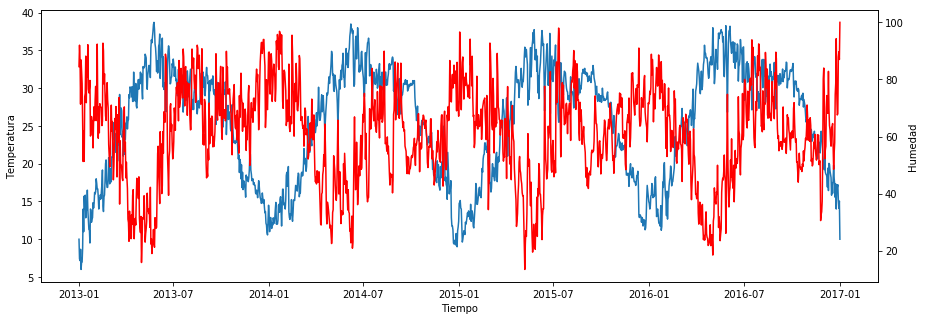

In [98]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(df_train['date'], df_train['meantemp'])
ax.set_xlabel('Tiempo')
ax.set_ylabel('Temperatura')
ax2 = ax.twinx()
ax2.plot(df_train['date'], df_train['humidity'], c="r")
ax2.set_ylabel('Humedad')
plt.show()

Se ve muycho ruido en los datos, ahora es donde seria util suavizar la curva

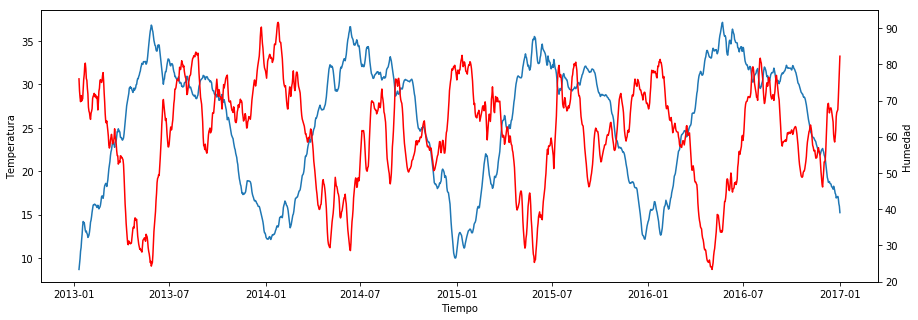

In [99]:
ventana = 10
df_train['meantemp_smooth'] = df_train['meantemp'].rolling(window=ventana).mean()
df_train['humidity_smooth'] = df_train['humidity'].rolling(window=ventana).mean()

# Eliminamos nans
df_train.dropna(inplace=True)

fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(df_train['date'], df_train['meantemp_smooth'])
ax.set_xlabel('Tiempo')
ax.set_ylabel('Temperatura')
ax2 = ax.twinx()
ax2.plot(df_train['date'], df_train['humidity_smooth'], c="r")
ax2.set_ylabel('Humedad')
plt.show()

Si lo que queremos es ver como se mueven todos los valores al mismo tiempo

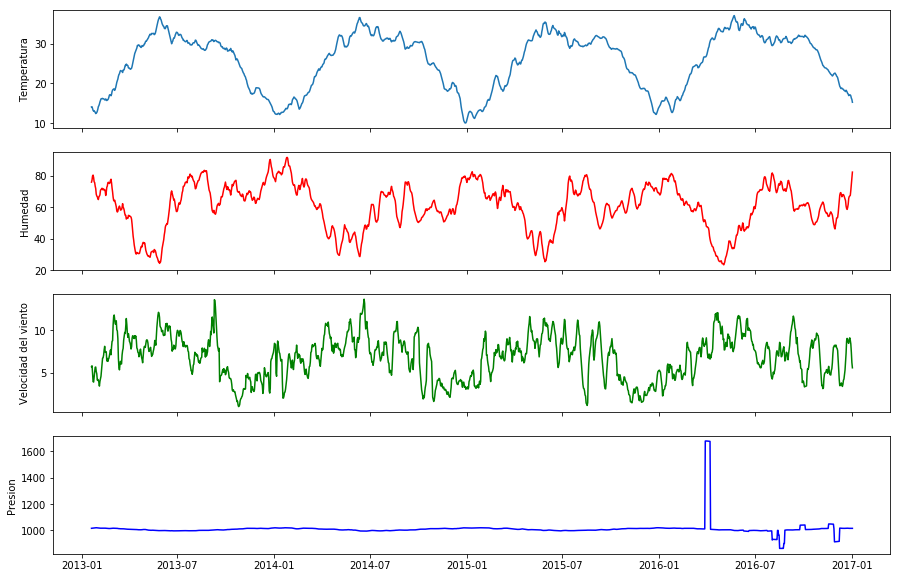

In [100]:
ventana = 10
df_train['wind_speed_smooth'] = df_train['wind_speed'].rolling(window=ventana).mean()
df_train['meanpressure_smooth'] = df_train['meanpressure'].rolling(window=ventana).mean()

# Eliminamos nans
df_train.dropna(inplace=True)

fig, ax = plt.subplots(4, 1, figsize=(15, 10), sharex=True)
ax[0].plot(df_train['date'], df_train['meantemp_smooth'])
ax[1].plot(df_train['date'], df_train['humidity_smooth'], c="r")
ax[2].plot(df_train['date'], df_train['wind_speed_smooth'], c="g")
ax[3].plot(df_train['date'], df_train['meanpressure_smooth'], c="b")
ax[0].set_ylabel('Temperatura')
ax[1].set_ylabel('Humedad')
ax[2].set_ylabel('Velocidad del viento')
ax[3].set_ylabel('Presion')
plt.show()

Los datos de presion atmosferica muestran una fuerte alza en un periodo en particular. Obtengamos boxplots para los valores.

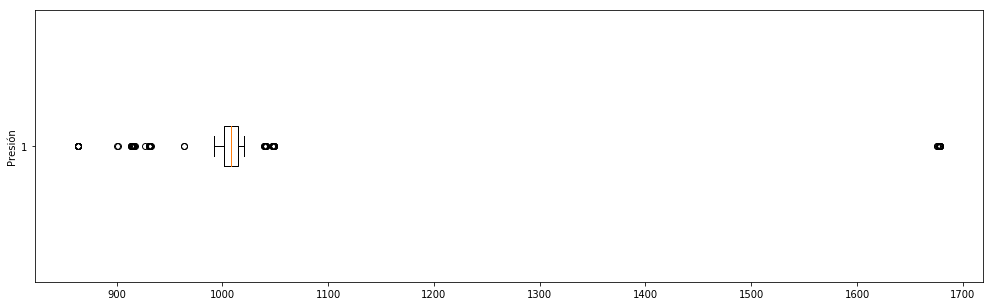

In [101]:
fig, ax = plt.subplots(figsize=(17,5))
ax.boxplot(df_train['meanpressure_smooth'], vert=False)
ax.set_ylabel("Presión")
plt.show()

### 2- ¿Que pasa si hay datos faltantes?

En estos datos no parece haber ningun dato faltante, de todas formas, con el fin de entender que hacer en estos casos, eliminaremos parte de la data para poder tratar de rellenar estos valores

In [102]:
# Generamos numeros aleatorios
import random
numeros = [random.randint(0,len(df_train)-1) for i in range(800)]
print(numeros)

[68, 215, 1318, 0, 22, 1171, 874, 1168, 779, 639, 168, 327, 392, 169, 1064, 942, 1004, 8, 64, 1148, 1086, 588, 110, 131, 691, 1324, 648, 799, 325, 924, 735, 494, 586, 1323, 315, 411, 215, 501, 484, 49, 323, 76, 549, 147, 856, 383, 1130, 789, 561, 119, 906, 833, 1031, 1242, 688, 322, 295, 444, 414, 1315, 461, 588, 762, 63, 175, 1041, 572, 618, 767, 297, 982, 162, 1296, 14, 1105, 1042, 1418, 83, 550, 1237, 762, 679, 746, 265, 1030, 1229, 652, 955, 933, 546, 23, 979, 990, 659, 1352, 1039, 1200, 433, 761, 1197, 785, 982, 258, 1139, 1028, 1307, 713, 980, 440, 1356, 1179, 847, 208, 195, 252, 196, 699, 459, 1025, 1046, 530, 103, 267, 280, 367, 388, 571, 854, 1098, 1440, 1240, 1423, 1088, 980, 38, 157, 243, 554, 206, 871, 1196, 863, 1098, 366, 93, 76, 144, 1031, 1209, 1207, 386, 77, 1143, 45, 811, 861, 385, 1418, 661, 106, 1158, 125, 72, 687, 488, 76, 821, 1237, 332, 1343, 663, 1201, 1334, 813, 1052, 1150, 676, 1214, 226, 912, 127, 90, 276, 1125, 1325, 869, 690, 124, 950, 1032, 769, 419, 3, 12

In [103]:
# Eliminamos aquellos numeros de los datos
df_train_ = df_train.reset_index(drop=True).drop(numeros).reset_index(drop=True)

In [104]:
# Juntamos los datasets
df_train_join = df_train.merge(df_train_, on=["date"], how="left")
df_train_join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1444 entries, 0 to 1443
Data columns (total 17 columns):
date                     1444 non-null datetime64[ns]
meantemp_x               1444 non-null float64
humidity_x               1444 non-null float64
wind_speed_x             1444 non-null float64
meanpressure_x           1444 non-null float64
meantemp_smooth_x        1444 non-null float64
humidity_smooth_x        1444 non-null float64
wind_speed_smooth_x      1444 non-null float64
meanpressure_smooth_x    1444 non-null float64
meantemp_y               828 non-null float64
humidity_y               828 non-null float64
wind_speed_y             828 non-null float64
meanpressure_y           828 non-null float64
meantemp_smooth_y        828 non-null float64
humidity_smooth_y        828 non-null float64
wind_speed_smooth_y      828 non-null float64
meanpressure_smooth_y    828 non-null float64
dtypes: datetime64[ns](1), float64(16)
memory usage: 203.1 KB


Ahora tenemos el mismo dataset anterior pero con menos informacion en algunas columnas.

Vamos a tratar de rellenar los valores faltantes para la temperatura y humedad

In [105]:
df_train_join["meantemp_y"] = df_train_join["meantemp_y"].interpolate('linear')

df_train_join["humidity_y"] = df_train_join["humidity_y"].interpolate('linear')

Comparemos ahora el original con el dataset que fue rellenado

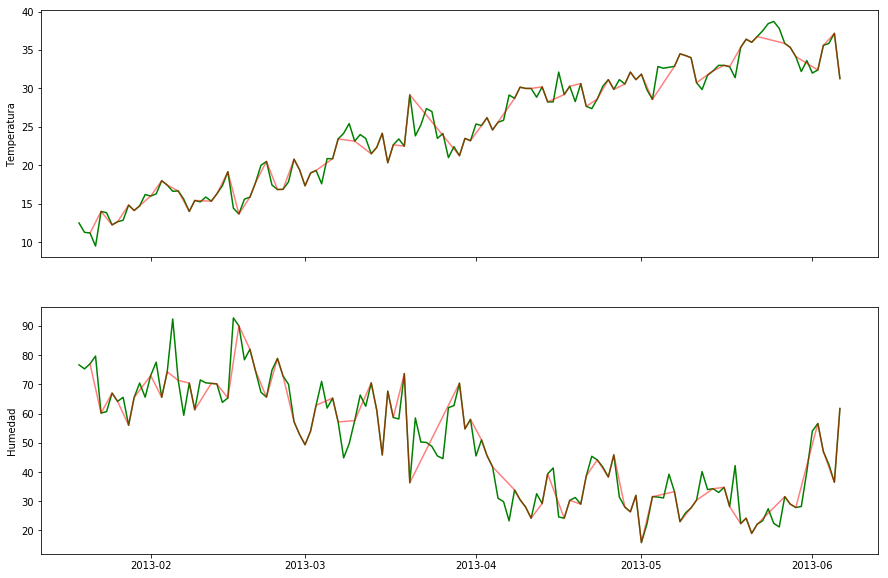

In [106]:
fig, ax = plt.subplots(2, 1, figsize=(15, 10), sharex=True)
ax[0].plot(df_train_join['date'][0:139], df_train_join['meantemp_x'][0:139], c="g")
ax[0].plot(df_train_join['date'][0:139], df_train_join['meantemp_y'][0:139], c="r", alpha=0.5)
ax[1].plot(df_train_join['date'][0:139], df_train_join['humidity_x'][0:139], c="g")
ax[1].plot(df_train_join['date'][0:139], df_train_join['humidity_y'][0:139], c="r", alpha=0.5)
ax[0].set_ylabel('Temperatura')
ax[1].set_ylabel('Humedad')
plt.show()

La serie verde muestra como son los datos los originales, mientras q la roja, como es la serie cuyos datos fueron interpolados

### 3- ¿Que hacemos con los outliers?

Un outlier es un dato atipico, es decir, uno que comparado con el resto de los datos es muy distinto. 

Supongamos que consideraremos atipico cualquier dato que este mas allá de dos desviaciones estandar de la media

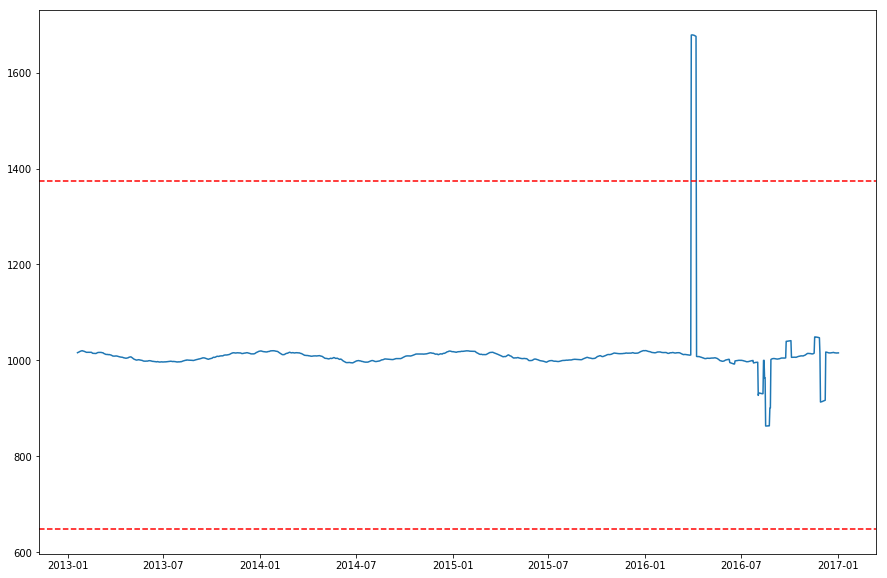

In [107]:
promedio = df_train['meanpressure'].mean()
std = df_train['meanpressure'].std()

fig, ax = plt.subplots(figsize=(15, 10), sharex=True)

ax.plot(df_train['date'], df_train['meanpressure_smooth'])
ax.axhline(promedio + std * 2, ls='--', c='r')
ax.axhline(promedio - std * 2, ls='--', c='r')

Si se fijan hay datos al final de la serie que son extraños, pero no entran en nuestra categoria, pero que hay del cambio que estos tienen a traves del tiempo

Calculamos el porcentaje de un punto con respecto a la media de los puntos anteriores

In [115]:
def variacion_promedio(values):

    valores_anteriores = values.iloc[:-1]
    ultimo_valor = values.iloc[-1]

    v_promedio = ((ultimo_valor - np.mean(valores_anteriores))
                  / np.mean(valores_anteriores))
    return v_promedio

In [117]:
df_train.reset_index(inplace=True, drop=True)
df_train['meanpressure_percent_change'] =\
    df_train['meanpressure'].rolling(window=10).aggregate(variacion_promedio)

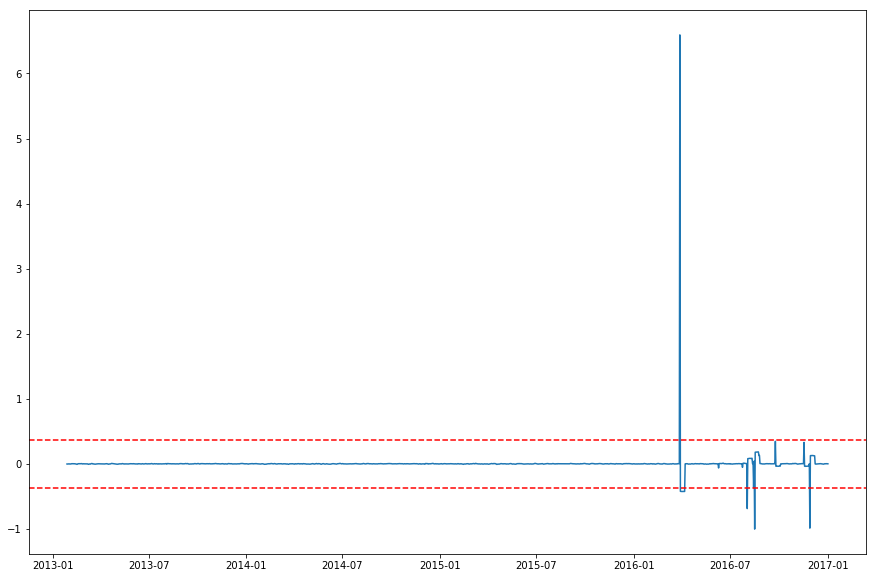

In [121]:
promedio = df_train['meanpressure_percent_change'].mean()
std = df_train['meanpressure_percent_change'].std()

fig, ax = plt.subplots(figsize=(15, 10), sharex=True)

ax.plot(df_train['date'], df_train['meanpressure_percent_change'])
ax.axhline(promedio + std * 2, ls='--', c='r')
ax.axhline(promedio - std * 2, ls='--', c='r')

Ahora más puntos aparecen como outliers.